#### <font color="#03997A"> Diplomado en Ciencia de datos UNAM </font>

##### <font color="#03997A"> Dr: Alejandro Pimentel </font>

##### <font color="#03997A"> Modulo 6 Aprendizaje de Maquina supervisado </font>

##### <font color="#03997A"> Tema 3: Regresión KNN Alumno: Ibarra Ramírez Sergio </font>

Vamos ausar los mismos datos que en caso del tema 2 de regresion lineal 

In [43]:
import pandas as pd 
tabla = pd.read_csv("https://gitlab.com/dgtic5/res/-/raw/main/aprendizajeSupervizado/Alumni_Giving_Regression.csv")

tabla

,A,B,C,D,E,F
0,24,0.42,0.16,0.59,0.81,0.08
1,19,0.49,0.04,0.37,0.69,0.11
2,18,0.24,0.17,0.66,0.87,0.31
3,8,0.74,0.00,0.81,0.88,0.11
4,8,0.95,0.00,0.86,0.92,0.28
...,...,...,...,...,...,...
118,11,0.54,0.03,0.89,0.94,0.29
119,15,0.37,0.22,0.69,0.83,0.13
120,23,0.32,0.19,0.59,0.80,0.12
121,19,0.43,0.06,0.49,0.73,0.13


De nuevo dividimos nuestra data entrain y test

In [44]:
from sklearn.model_selection import train_test_split

# AQUI SEPARO DEPENDIENTE DE INDEPENDIENTES
y = tabla["E"] 
X = tabla.drop(["E"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2023)

Importamos las librerias necesarias para KNN 

In [58]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor

Vamos a definir los objetos que conttendran los a un k y/o radio específico 

In [59]:
modeloK = KNeighborsRegressor(n_neighbors=5)
modeloR = RadiusNeighborsRegressor(radius=10)

Ahora entrenamos a nuestros modelos con el clasico model.fit(X_train, y_train)

In [60]:
modeloK_ejemplo = modeloK.fit(X_train,y_train)
modeloR_ejemplo = modeloR.fit(X_train,y_train)

Ahora hacemos la predcción con el modelo ya construido y los datos de test y calculamos los errores

In [61]:
from sklearn.metrics import mean_squared_error

y_predK = modeloK_ejemplo.predict(X_test)
RMSE = mean_squared_error(y_test,y_predK,squared=False)
print(RMSE)

y_predR = modeloR_ejemplo.predict(X_test)
RMSE = mean_squared_error(y_test,y_predR,squared=False)
print(RMSE)

0.06355344207830133
0.06897823401086502


Vamos a ayudarnos de la visualización 

In [66]:
modeloVK = KNeighborsRegressor(n_neighbors=5)
modeloVR = RadiusNeighborsRegressor(radius=5)

modeloVK.fit(X_train["B"].to_numpy().reshape(-1,1),y_train)
modeloVR.fit(X_train["B"].to_numpy().reshape(-1,1),y_train)

RadiusNeighborsRegressor(radius=5)

Se muestra el ejemplo de aplicación de modelo KNN regresion con K=5 y limitando la visualización a una sola variable independiente

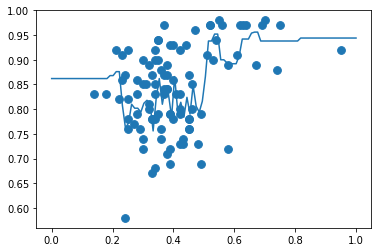

In [67]:
import matplotlib.pyplot as plt
import numpy as np

x_func = np.linspace(0,1,100)
y_func = modeloVK.predict(x_func.reshape(-1,1))

x_points = X_train["B"]
y_points = y_train

fig, ax = plt.subplots()
ax.plot(x_func,y_func)
ax.scatter(x_points,y_points,s=60)

Veamos como se observa con los datos de prueba 

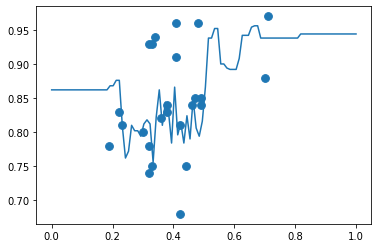

In [68]:
x_points = X_test["B"]
y_points = y_test

fig, ax = plt.subplots()
ax.plot(x_func,y_func)
ax.scatter(x_points,y_points,s=60)

Ahora para el caso del radio 

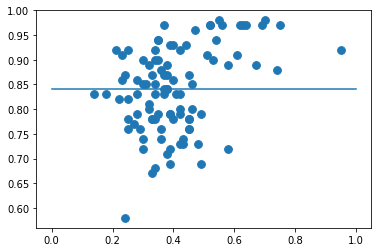

In [69]:
x_func = np.linspace(0,1,100)
y_func = modeloVR.predict(x_func.reshape(-1,1))

x_points = X_train["B"]
y_points = y_train

fig, ax = plt.subplots()
ax.plot(x_func,y_func)
ax.scatter(x_points,y_points,s=60)

Ejemplo de iteracion para cálculo de k óptimo con base en el RMSE

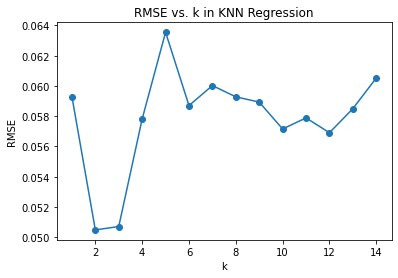

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Define the range of k values
k_values = np.arange(1, 15)

# Initialize an empty list to store the RMSE values
rmse_values = []

# Loop through each k value
for k in k_values:
    # Define the KNN regression model
    modeloK = KNeighborsRegressor(n_neighbors=k)
    
    # Fit the model to the training data
    modeloK.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_predK = modeloK.predict(X_test)
    
    # Calculate the RMSE
    rmse = mean_squared_error(y_test, y_predK, squared=False)
    
    # Append the RMSE value to the list
    rmse_values.append(rmse)

# Plot the RMSE values against the k values
plt.plot(k_values, rmse_values, marker='o')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.title('RMSE vs. k in KNN Regression')
plt.show()


Ejemplo de iteracion para cálculo de r óptimo con base en el RMSE

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


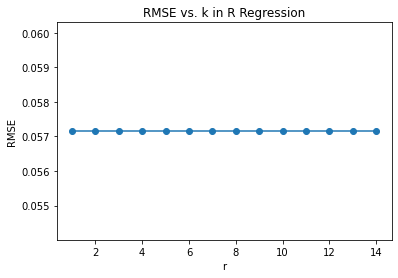

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Define the range of k values
R_values = np.arange(1, 15)

# Initialize an empty list to store the RMSE values
rmse_R_values = []

# Loop through each k value
for r in R_values:
    # Define the KNN regression model
    modeloR = RadiusNeighborsRegressor(radius=r)
    
    # Fit the model to the training data
    modeloR.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_predR = modeloR.predict(X_test)
    
    # Calculate the RMSE
    rmse_R = mean_squared_error(y_test, y_predK, squared=False)
    
    # Append the RMSE value to the list
    rmse_R_values.append(rmse_R)

# Plot the RMSE values against the k values
plt.plot(R_values, rmse_R_values, marker='o')
plt.xlabel('r')
plt.ylabel('RMSE')
plt.title('RMSE vs. k in R Regression')
plt.show()